# Report
The database obtained contain 27558 examples of cell images divided in 2 classes (Uninfected and Parasitized), where each class has 13779 examples (half of the whole database). All images are colored (RGB images), but have different sizes. Besides, cells inside images may have different shapes, colors and percentage of occupation of the hole $n$ x $m$ grid. Some examples of images from each class are shown below (left column to uninfected cells and right column to parasitized ones):

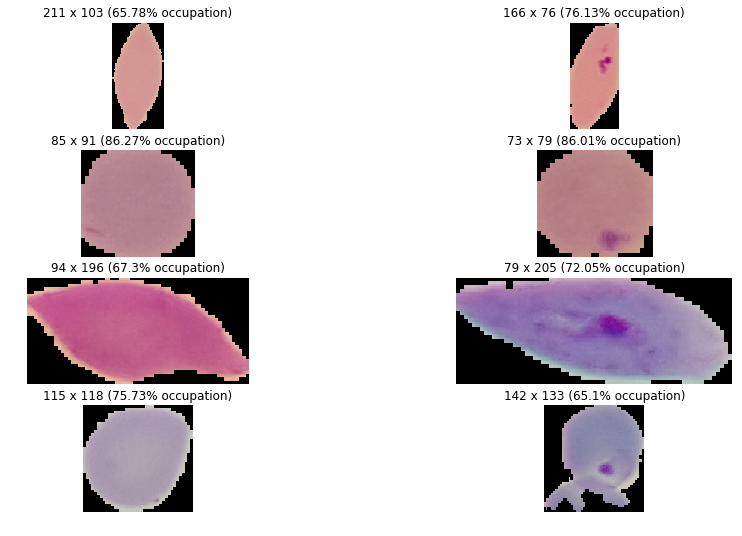

In [1]:
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

# Mostra alguns exemplos da base de dados
plot_param = {'fontsize' : 15, 'fontweight' : "bold"}
classes = ['0 - Uninfected' , '1 - Parasitized']
Ex_N = [[2891, 1793, 10822, 3206],[4198, 11197, 7448, 4698]]
n = len(Ex_N[0])
path = 'G:/Thales/Documents/Acadêmico/Doutorado/Processamento de Imagem/Trabalho Final/cell_images'

Ex_path = [path + '/' + classes[0] + '/' + str(num) + '.png' for num in Ex_N[0]] +\
          [path + '/' + classes[1] + '/' + str(num) + '.png' for num in Ex_N[1]]
Ex = [np.array(imageio.imread(img_path))/255 for img_path in Ex_path]


plt.figure(figsize=[15,9])

k = 1
for img in Ex[:4]:
    lin, col = np.shape(np.mean(img,2))
    pos = np.where(np.mean(img,2) != 0)
    plt.subplot(n,2,k); plt.imshow(img); plt.axis('off')
    plt.title(str(lin) + ' x ' + str(col) + ' (' + str(round(len(pos[0])/(lin*col)*100,2)) + '% occupation)')
    k += 2
    
k = 2
for img in Ex[4:]:
    lin, col = np.shape(np.mean(img,2))
    pos = np.where(np.mean(img,2) != 0)
    plt.subplot(n,2,k); plt.imshow(img); plt.axis('off')
    plt.title(str(lin) + ' x ' + str(col) + ' (' + str(round(len(pos[0])/(lin*col)*100,2)) + '% occupation)')
    k += 2

First we divided the dataset into two subsets, namely Training (90%) and Testing (10%). The proposed algorithm to classify an image into uninfected or parasitized classes has the following steps:  
 * Median Substraction
 * Filtering Based on Subtraction Signal
 * Filtering Based on Color Level
 * Score Obtainment and Classification  
  
All parameters of the algorithm are adjusted using only the images in the Training subset and at the end of this work, all metrics are calculated processing images in the Testing subset using the algorithm with the parameters obatined in the previous phase. When omitted, we understand implicitly that the processing applied at the collored image is done by processing each of its R, G and B chanels separatedly.  
Consider the images below. All steps of the algorithm and its partial results will be based on these example images. The intensities of the images are normalized to the $[0, 1]$ range in the beggining of the algorithm.

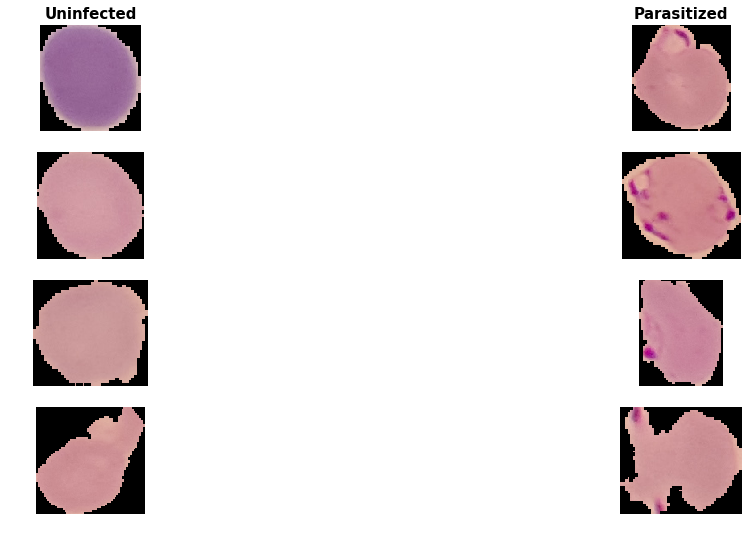

In [2]:
# Randomize n images of each class e shows each step of the processing with the parameters already adjusted
n = 4
plot_param = {'fontsize' : 15, 'fontweight' : "bold"}
classes = ['0 - Uninfected' , '1 - Parasitized']
path = 'G:/Thales/Documents/Acadêmico/Doutorado/Processamento de Imagem/Trabalho Final/cell_images'

N0 = len(os.listdir(path + '/' + classes[0]))-1
N1 = len(os.listdir(path + '/' + classes[1]))-1
N0_samples = [num for num in np.random.randint(int(0.9*N0),N0+1,n)]
N1_samples = [num for num in np.random.randint(int(0.9*N1),N1+1,n)]
IMGS_path = [path + '/' + classes[0] + '/' + str(num) + '.png' for num in N0_samples] +\
            [path + '/' + classes[1] + '/' + str(num) + '.png' for num in N1_samples]         
IMGS = [np.array(imageio.imread(img_path))/255 for img_path in IMGS_path]


plt.figure(figsize=(15,9))

k = 1
for img in IMGS[:n]:
    plt.subplot(n,3,k)
    plt.imshow(img)
    plt.axis('off')
    if k==1 : plt.title('Uninfected', plot_param)
    k += 3
    
k = 3
for img in IMGS[n:]:
    plt.subplot(n,3,k)
    plt.imshow(img)
    plt.axis('off')
    if k==3 : plt.title('Parasitized', plot_param)
    k += 3

# 1 - Median Subtraction  
Once the color of the cells may be different, first we calculate its median color considering only pixels belonging to the object (black $(0,0,0)$ pixels in the image are ignored). Then we may generate an 'Median Image' (the original cell image with all object pixel colors setted to its median value) and then generate another image (called 'Centralized Image') by just subtracting them. 

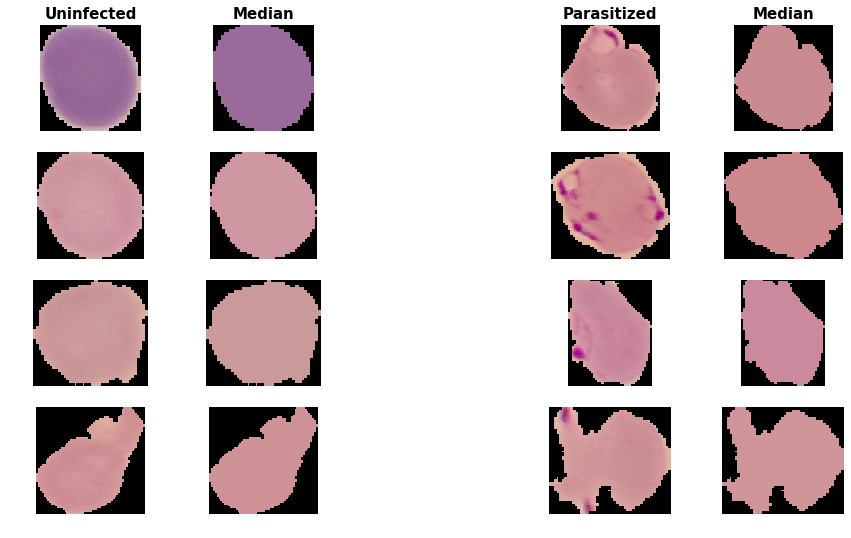

In [3]:
# Calculate Medians
IMGS_medianas = [np.zeros(np.shape(img)) for img in IMGS]
for i in range(2*n):
    img = IMGS[i].copy()
    pos = np.where(np.sum(img,2)!=0)
    for j in range(3):
        camada = img[:,:,j]
        camada[pos] = np.median(camada[pos])
    IMGS_medianas[i] = img.copy()


plt.figure(figsize=(15,9))

k = 1
for img in IMGS[:n]:
    plt.subplot(n,5,k)
    plt.imshow(img)
    plt.axis('off')
    if k==1 : plt.title('Uninfected', plot_param)
    k += 5

k = 2
for img in IMGS_medianas[:n]:
    plt.subplot(n,5,k)
    plt.imshow(img)
    plt.axis('off')
    if k==2 : plt.title('Median', plot_param)
    k += 5

k = 4
for img in IMGS[n:]:
    plt.subplot(n,5,k)
    plt.imshow(img)
    plt.axis('off')
    if k==4 : plt.title('Parasitized', plot_param)
    k += 5

k = 5
for img in IMGS_medianas[n:]:
    plt.subplot(n,5,k)
    plt.imshow(img)
    plt.axis('off')
    if k==5 : plt.title('Median', plot_param)
    k += 5

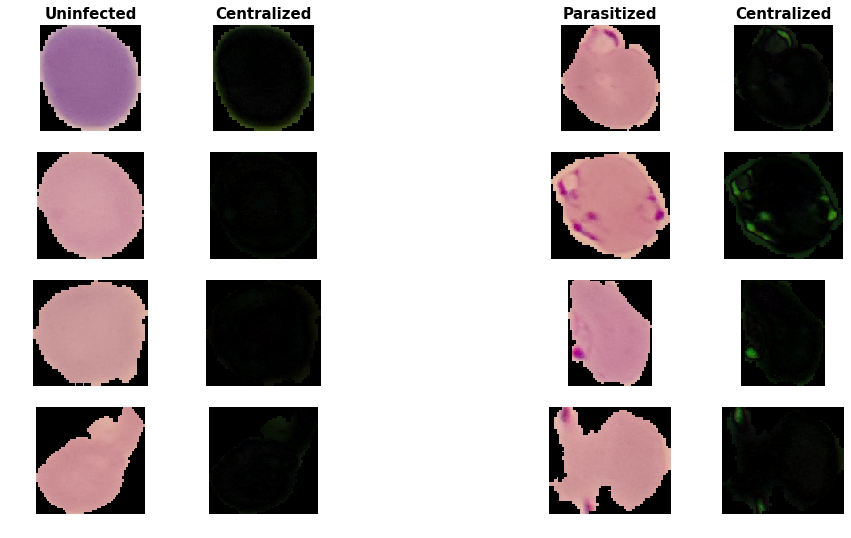

In [4]:
# Subtract Images From Their Medians
IMGS_centralizadas = [IMGS[i]-IMGS_medianas[i] for i in range(2*n)]


plt.figure(figsize=(15,9))

k = 1
for img in IMGS[:n]:
    plt.subplot(n,5,k)
    plt.imshow(img)
    plt.axis('off')
    if k==1 : plt.title('Uninfected', plot_param)
    k += 5
    
k = 2
for img in IMGS_centralizadas[:n]:
    plt.subplot(n,5,k)
    plt.imshow(abs(img))
    plt.axis('off')
    if k==2 : plt.title('Centralized', plot_param)
    k += 5


k = 4
for img in IMGS[n:]:
    plt.subplot(n,5,k)
    plt.imshow(img)
    plt.axis('off')
    if k==4 : plt.title('Parasitized', plot_param)
    k += 5
    
k = 5
for img in IMGS_centralizadas[n:]:
    plt.subplot(n,5,k)
    plt.imshow(abs(img))
    plt.axis('off')
    if k==5 : plt.title('Centralized', plot_param)
    k += 5

Observe that the centralized image is generaly a black (indicating that many pixels in the original image has its values next to the median color of the whole cell) but points with different colors are highlighted.  
  
# 2- Filtering Based on Subtraction Signal
To show Centralized images above, we took its absolute value, once subtraction of two images may output either (zero, ) positive or negative values. It was empiricaly observed that regions belonging to Malaria infection had negative values in the Centralized image (intuitively, Malaria infection regions has in general intensities lower then the intensity of the cell). This empirical evidence is shown below when we separate the Centralized image into Negative and Positive parts.

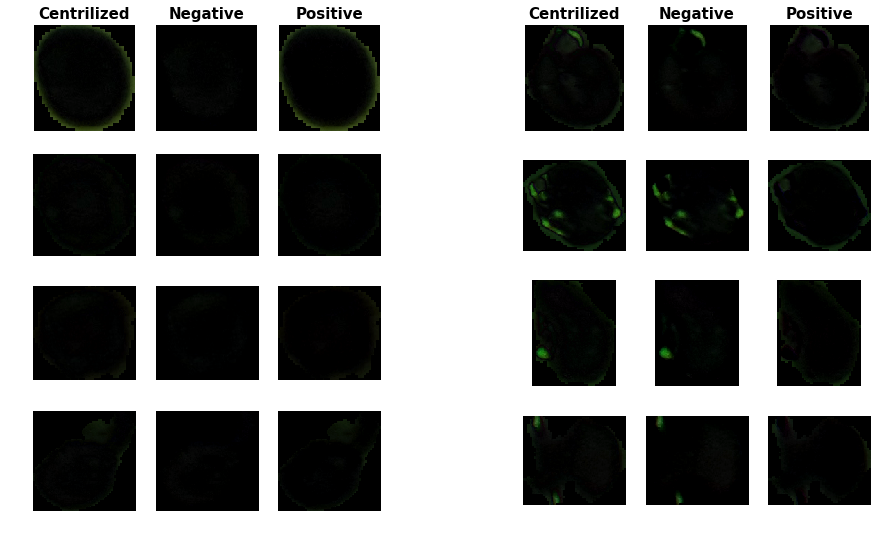

In [5]:
# Separate in Positive and Negative Parts
IMGS_neg = [None]*(2*n)
IMGS_pos = [None]*(2*n)
for i in range(2*n):
    img_neg = -IMGS_centralizadas[i].copy()
    img_pos = IMGS_centralizadas[i].copy()
    img_neg[img_neg<0] = 0
    img_pos[img_pos<0] = 0
    IMGS_neg[i] = img_neg.copy()
    IMGS_pos[i] = img_pos.copy()


plt.figure(figsize=(15,9))

k = 1
for img in IMGS_centralizadas[:n]:
    plt.subplot(n,7,k)
    plt.imshow(abs(img))
    plt.axis('off')
    if k==1 : plt.title('Centralized', plot_param)
    k += 7
    
k = 2
for img in IMGS_neg[:n]:
    plt.subplot(n,7,k)
    plt.imshow(img)
    plt.axis('off')
    if k==2 : plt.title('Negative', plot_param)
    k += 7

k = 3
for img in IMGS_pos[:n]:
    plt.subplot(n,7,k)
    plt.imshow(img)
    plt.axis('off')
    if k==3 : plt.title('Positive', plot_param)
    k += 7

k = 5
for img in IMGS_centralizadas[n:]:
    plt.subplot(n,7,k)
    plt.imshow(abs(img))
    plt.axis('off')
    if k==5 : plt.title('Centralized', plot_param)
    k += 7
    
k = 6
for img in IMGS_neg[n:]:
    plt.subplot(n,7,k)
    plt.imshow(img)
    plt.axis('off')
    if k==6 : plt.title('Negative', plot_param)
    k += 7

k = 7
for img in IMGS_pos[n:]:
    plt.subplot(n,7,k)
    plt.imshow(img)
    plt.axis('off')
    if k==7 : plt.title('Positive', plot_param)
    k += 7

That way, the Positive part is ignored while just the Negative one forward to the next step of the processing.  
  
# 3 - Filtering Based on Color Level  
  
We want to disconsider low color levels by thresholding its values. In this step, we see each pixel's content as an $\mathbb{R}^3$ vector (containing its R, G and B informations) and we consider its level as the euclidian norm of this vector. To adjust the threshold value, we computed the histogram of all Negative parts of the Centralized Image of all samples in the (Training subset of the) database, shown below.

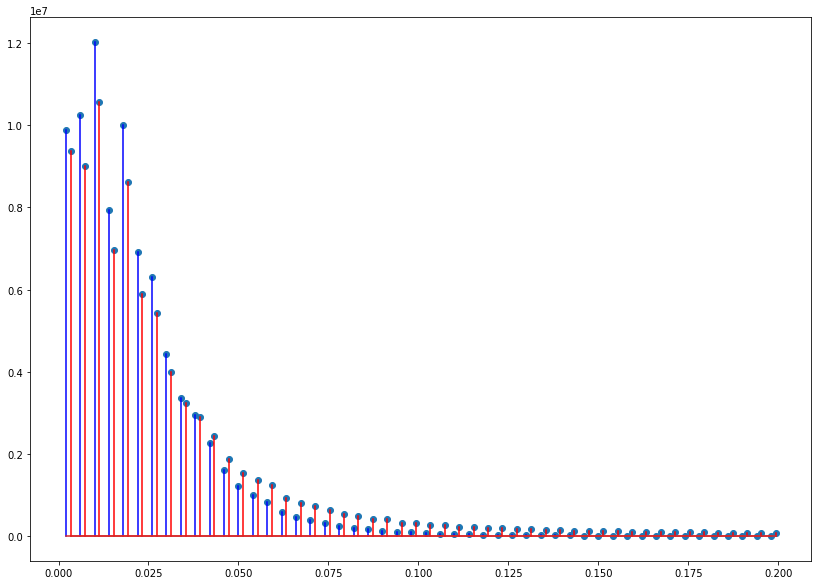

In [9]:
# Generate Histogram of the Training Part
bins_num = 50
bins_range = [0, 0.2]
dx = (bins_range[1]-bins_range[0])/bins_num
path = 'G:/Thales/Documents/Acadêmico/Doutorado/Processamento de Imagem/Trabalho Final/cell_images'

classes = ['0 - Uninfected' , '1 - Parasitized']
hist = np.zeros([len(classes), bins_num])
bins_edges = np.linspace(bins_range[0], bins_range[1], bins_num+1)
bins_means = np.mean(np.stack([bins_edges[:-1], bins_edges[1:]]),0)
for i in range(len(classes)):
    N = len(os.listdir(path + '/' + classes[i]))-1
    N0, N = 0, int(0.9*N)
    for num in range(N0,N):
        if num%500 == 0: clc(); print('Classe ' + classes[i] + ': ' + str(round((num-N0)/(N-N0)*100,2)) + '%'); time.sleep(0.1)
        img_path = path + '/' + classes[i] + '/' + str(num) + '.png'
        img = np.array(imageio.imread(img_path))/255
        pos = np.where(np.sum(img,2)!=0)
        for j in range(3):
            camada = img[:,:,j]
            camada[pos] = camada[pos]-np.median(camada[pos])
        img[img>0] = 0
        img = np.sqrt(np.sum(img**2,2))
        hist[i,:] += np.histogram(img[img>0], bins=bins_num, range=bins_range)[0]

clc()
plt.figure(figsize=[14,10])
plt.plot([0,0],[0,0.01],'blue')
plt.plot([0.05,0.15],[0.05,0],'red')
plt.legend(['Uninfected', 'Parasitized'])
plt.stem(bins_means,hist[0,:], 'blue')
plt.stem(bins_means+dx/3,hist[1,:], 'red')
plt.show()

Observing the histogram and some particular image results, the threshold was empericaly adjusted to the value of 0.073. Note that above this value just few pixels of uninfected images remains with non-zero values while there are still some significant amount of non-zeros value pixels present in parasitized images.  
Thresholding the example images with the value obtained, we get the partial result shown below:

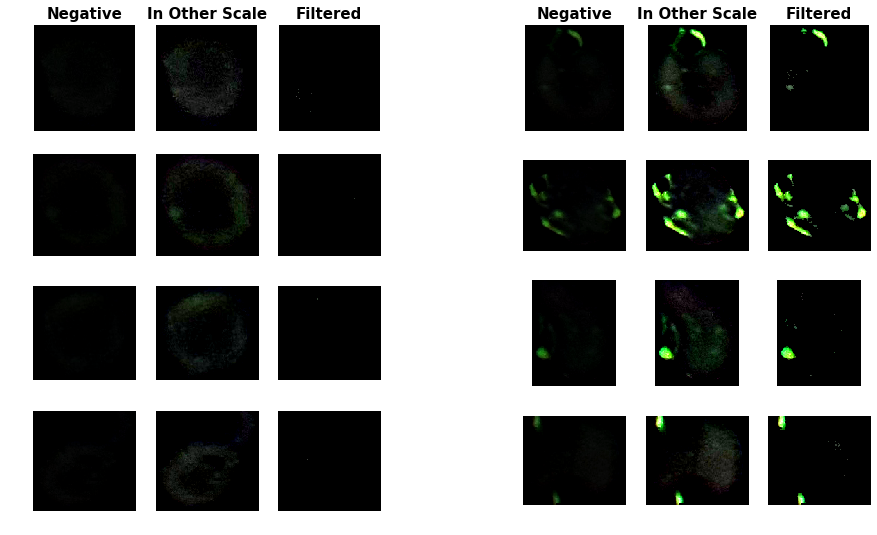

In [11]:
# Coloring Thresholding
T = 0.073

IMGS_filtradas = [img.copy() for img in IMGS_neg]
for i in range(2*n):
    pos = np.where(np.sqrt(np.sum(IMGS_neg[i]**2,2))<T)
    for j in range(3):
        camada = IMGS_filtradas[i][:,:,j]
        camada[pos] = 0


plt.figure(figsize=(15,9))

k = 1
for img in IMGS_neg[:n]:
    plt.subplot(n,7,k)
    plt.imshow(abs(img))
    plt.axis('off')
    if k==1 : plt.title('Negative', plot_param)
    k += 7
    
k = 2
for img in IMGS_neg[:n]:
    plt.subplot(n,7,k)
    plt.imshow(np.clip(img*5,0,1))
    plt.axis('off')
    if k==2 : plt.title('In Other Scale', plot_param)
    k += 7

k = 3
for img in IMGS_filtradas[:n]:
    plt.subplot(n,7,k)
    plt.imshow(np.clip(img*5,0,1))
    plt.axis('off')
    if k==3 : plt.title('Filtered', plot_param)
    k += 7

k = 5
for img in IMGS_neg[n:]:
    plt.subplot(n,7,k)
    plt.imshow(abs(img))
    plt.axis('off')
    if k==5 : plt.title('Negative', plot_param)
    k += 7
    
k = 6
for img in IMGS_neg[n:]:
    plt.subplot(n,7,k)
    plt.imshow(np.clip(img*5,0,1))
    plt.axis('off')
    if k==6 : plt.title('In Other Scale', plot_param)
    k += 7

k = 7
for img in IMGS_filtradas[n:]:
    plt.subplot(n,7,k)
    plt.imshow(np.clip(img*5,0,1))
    plt.axis('off')
    if k==7 : plt.title('Filtered', plot_param)
    k += 7

# 4 - Score Obtainment and Classification  
  
In this step, we compute a score to each image by summing the value of each pixel. Recall that we consider the a value of a pixel as the euclidian norm of the RGB vector assossiated to it. That way we expect that images containing uninfected and parasitized cells will, respectively, be mapped to low and high scores.  
For each possible value of threshold we may compute the quantities:  
 * TP: True Positives (Parasitized samples correctly classified);
 * TN: True Negatives (Uninfected samples correctly classified);
 * FP: False Positives (Uninfected samples classified as Parasitized); and
 * FN: False Negatives (Parasitized samples classified as Uninfected).  

And then use the values found to calculate the Precision (P) and Recall (R) metrics, given by:  
  
$ P = \frac{TP}{TP + FP} $  
  
$ R = \frac{TP}{TP + FN} $  
  
The precision metric tells which percentage of what the algorithm classify as parasitized cells are actually infected; while the recall metric tells which percentage of what is infected the algorithm detects as parasitized. Note that if we choose a very low threshold value, we are classifying virtually all cells as parasitized, obtaining almost none False Negative but many False Positives, hence the precision is low, while the recall is (near) 1. In the other hand, if we choose a very high threshold value, we are calssifying almost all images as uninfected, obtaining many False Negatives but almost none False Positives, and that way the precision is high while the recall is (near) 0. A well-adjusted value of threshold will lead to a good compromise between precision and recall metrics.  
The graph below shows (in the left) the precision/recall obtained for each possible value of threshold; and (in the right) the precision x recall ($P$ x $R$) curve.

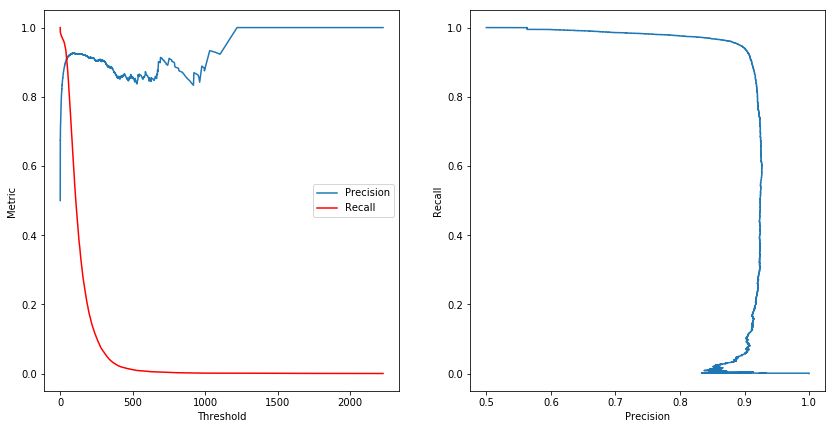

In [15]:
# Generate Precision x Recall Curve (of the Training Part)
score = []
label = []
for i in range(len(classes)):
    N = len(os.listdir(path + '/' + classes[i]))-1
    N0, N = 0, int(0.9*N)
    label += [int(classes[i][0])]*(N-N0)
    for num in range(N0,N):
        img_path = path + '/' + classes[i] + '/' + str(num) + '.png'
        img = np.array(imageio.imread(img_path))/255
        pos = np.where(np.sum(img,2)!=0)
        for j in range(3):
            camada = img[:,:,j]
            camada[pos] = camada[pos]-np.median(camada[pos])
        img[img>0] = 0
        img = abs(img)
        pos = np.where(np.sqrt(np.sum(img**2,2))<T)
        for j in range(3):
            camada = img[:,:,j]
            camada[pos] = 0
        score.append(np.sum(np.sqrt(np.sum(img**2,2))))

label, score = np.array(label), np.array(score)
pos = np.argsort(score)
label, score = label[pos], score[pos]
N = len(label)
TP = np.array([np.sum(label[i:]   ) for i in range(N)])
FP = np.array([np.sum(label[i:]==0) for i in range(N)])
FN = np.array([np.sum(label[:i]   ) for i in range(N)])

precis = np.divide(TP,TP+FP)
recall = np.divide(TP,TP+FN)

plt.figure(figsize=[14,7])
plt.subplot(1,2,1); plt.xlabel('Threshold'); plt.ylabel('Metric')
plt.plot(score, precis); plt.plot(score, recall, 'r'); plt.legend(['Precision', 'Recall'])
plt.subplot(1,2,2); plt.xlabel('Precision'); plt.ylabel('Recall');
plt.plot(precis, recall, 'black');

We choose the threshold value that implies the point of the $P$ x $R$ curve that is nearest to the point $(1,1)$ (the ideal values of the metrics). That way, the threshold obtained is $T = 36.71$, assossiated to $90.06\%$ precision and $93.96\%$ recall (in the Training subset).

Threshold: 36.71
Precision: 90.06%
Recall: 93.96%


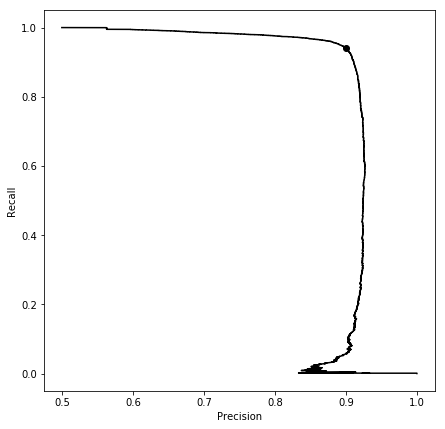

In [18]:
dist2 = (1-precis)**2 + (1-recall)**2
pos = np.argmin(dist2)
T = np.mean(score[[pos-1,pos]])
P = precis[pos]
R = recall[pos]
print('Threshold: ' + str(round(T    ,2))      )
print('Precision: ' + str(round(100*P,2)) + '%')
print('Recall: '    + str(round(100*R,2)) + '%')

plt.figure(figsize=[7,7])
plt.xlabel('Precision'); plt.ylabel('Recall');
plt.plot(precis, recall, 'black'); plt.plot(P, R, 'ok')

Returning to the example images, if we threshold its scores by the value found, we obain the result shown below. The title of the image is the class estimated by the proposed algorithm and the value in parathesis is the score in which that cell were mapped.

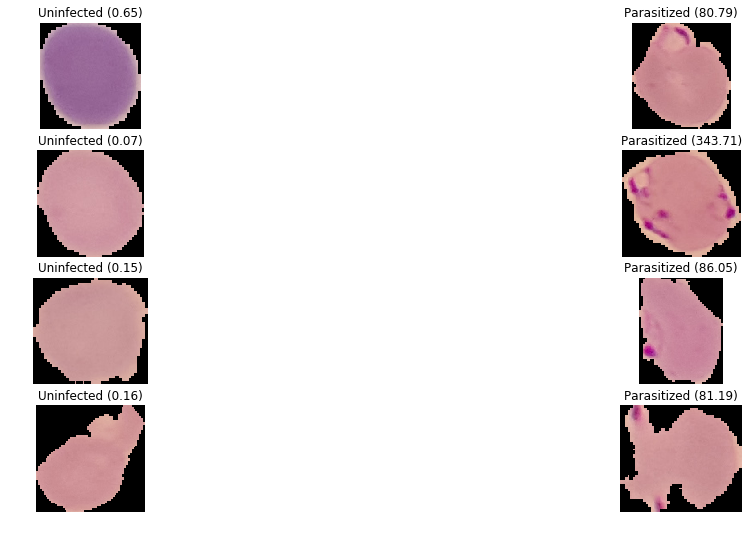

In [20]:
# Classification by Thresholding
T = 36.71

IMGS_scores = np.array([np.sum(np.sqrt(np.sum(img**2,2))) for img in IMGS_filtradas])
IMGS_labels = IMGS_scores>T


plt.figure(figsize=(15,9))
i=0

k = 1
for img in IMGS[:n]:
    plt.subplot(n,3,k)
    plt.imshow(img)
    plt.axis('off')
    titulo = 'Parasitized' if IMGS_labels[i] else 'Uninfected'
    titulo += ' (' + str(round(IMGS_scores[i],2)) + ')'
    plt.title(titulo)
    i+=1
    k += 3


k = 3
for img in IMGS[n:]:
    plt.subplot(n,3,k)
    plt.imshow(img)
    plt.axis('off')
    titulo = 'Parasitized' if IMGS_labels[i] else 'Uninfected'
    titulo += ' (' + str(round(IMGS_scores[i],2)) + ')'
    plt.title(titulo)
    i+=1
    k += 3

Applying the whole algorithm to the Testing subset of the dataset, we obtain $88.04\%$ precision and $93.98\%$ recall.

In [21]:
# Generate Metrics on the Testing Subset
T = 0.073

score = []
label = []
for i in range(len(classes)):
    N = len(os.listdir(path + '/' + classes[i]))-1
    N0 = int(0.9*N)
    label += [int(classes[i][0])]*(N-N0)
    for num in range(N0,N):
        img_path = path + '/' + classes[i] + '/' + str(num) + '.png'
        img = np.array(imageio.imread(img_path))/255
        pos = np.where(np.sum(img,2)!=0)
        for j in range(3):
            camada = img[:,:,j]
            camada[pos] = camada[pos]-np.median(camada[pos])
        img[img>0] = 0
        img = abs(img)
        pos = np.where(np.sqrt(np.sum(img**2,2))<T)
        for j in range(3):
            camada = img[:,:,j]
            camada[pos] = 0
        score.append(np.sum(np.sqrt(np.sum(img**2,2))))

T = 36.71
label, score = np.array(label), np.array(score)
classe = score>T
N = len(label)
TP = np.sum(   classe  &    label )
FP = np.sum(   classe  & (1-label))
FN = np.sum((1-classe) &    label )

P = TP/(TP+FP)
R = TP/(TP+FN)

print('Precision: ' + str(round(100*P,2)) + '%')
print('Recall: '    + str(round(100*R,2)) + '%')

Precision: 88.04%
Recall: 93.98%


(analisar exemplos que deram errado)